In [24]:
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("..")
from config import *
from scripts.SNR import SNR
from scripts.plot_images import plot_images
from scripts.plot_line_defect import plot_line
from scripts.Amp_phase_func import *
from scripts.plot_rect import *
import numpy as np
from sklearn.linear_model import LinearRegression
import math

In [25]:
loaded_node_temp= pd.read_pickle(Dict_temp_0_182)
loaded_nodes_loc=pd.read_pickle(Nodes_loc_0_182)
df= pd.read_csv(result_df)
df.head()

,df_0_028.csv_Amplitude,df_0_028.csv_Phase,df_0_038.csv_Amplitude,df_0_038.csv_Phase,df_0_055.csv_Amplitude,df_0_055.csv_Phase,df_0_071.csv_Amplitude,df_0_071.csv_Phase,df_0_093.csv_Amplitude,df_0_093.csv_Phase,df_0_126.csv_Amplitude,df_0_126.csv_Phase,df_0_182.csv_Amplitude,df_0_182.csv_Phase
0,0.127052,0.968112,0.005076,1.237575,0.078934,0.745113,0.159318,-0.630214,0.135850,0.779373,0.140204,0.768051,0.072259,-0.921047
1,0.127871,0.964349,0.005514,1.108180,0.078420,0.754151,0.159201,-0.596778,0.135515,0.788076,0.140043,0.778478,0.072335,-0.878552
2,0.127781,0.964507,0.005469,1.111743,0.078435,0.754137,0.159796,-0.538084,0.135530,0.788047,0.140064,0.778372,0.073018,-0.808010
3,0.128575,0.962778,0.005919,1.068277,0.078197,0.755935,0.160251,-0.511245,0.135430,0.789716,0.140000,0.780440,0.073464,-0.775719
4,0.128304,0.963362,0.005760,1.081913,0.078277,0.755404,0.162663,-0.324922,0.135462,0.789237,0.140024,0.779832,0.077669,-0.541308


In [26]:

len(loaded_nodes_loc)

522

In [27]:
#len(loaded_node_temp[0.0999])

In [28]:
temperature =[]
# Using a loop
for key in loaded_node_temp:
    if len(loaded_node_temp[key]) >= 3:  # Make sure the list has at least 2 elements
        temperature .append(loaded_node_temp[key][2])

print(temperature )


[25.000004204548045, 25.000012596988295, 25.000025160773987, 25.000041879466536, 25.000062736734645, 25.000087716353374, 25.00011680220326, 25.000149978269484, 25.000187228640943, 25.00022853750946, 25.000281839043687, 25.000347325240114, 25.000424948360806, 25.000514660978148, 25.000616415972264, 25.00073016652851, 25.000855866134934, 25.00099346857978, 25.001142927949115, 25.00130419862431, 25.00148433509262, 25.001683704492343, 25.001902232391547, 25.002139844838364, 25.002396468357023, 25.002672029944016, 25.002966457064268, 25.00327967764738, 25.00361162008387, 25.0039622132215, 25.00433731382028, 25.004737397186606, 25.00516236793693, 25.005612131297863, 25.00608659310131, 25.006585659779628, 25.007109238360883, 25.007657236464112, 25.008229562294673, 25.00882612463961, 25.009451348509547, 25.010105723063305, 25.01078913866945, 25.011501486391936, 25.012242657984725, 25.01301254588633, 25.01381104321451, 25.01463804376097, 25.015493441986155, 25.01637713301407, 25.017291968664196

In [29]:
amplitude_data = df["df_0_028.csv_Amplitude"].values
phase_data = df["df_0_028.csv_Phase"].values

In [30]:
len(amplitude_data)

8887

In [31]:
amp= amplitude_data[2]
ph= phase_data[2]
time = list(loaded_node_temp.keys())

Fitted 'a' coefficient: 25.116835560563324
Fitted 'b' coefficient: 0.03017234819358194


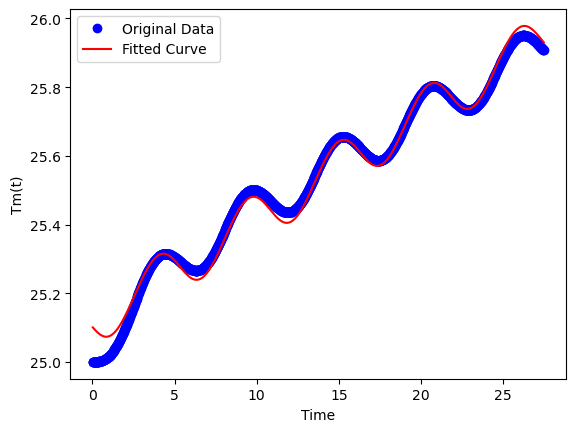

In [32]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the function Tm(t) = a + bt + ∑∆Tn sin(nωt + ϕn) for n = 1, 3, 5, 7
def tm_function(t, a, b, *params):
    result = a + b * t
    num_terms = len(params) // 2  # Since each term has both ∆Tn and ϕn
    for n in range(1, num_terms + 1):
        delta_Tn = params[2*n - 2]
        phi_n = params[2*n - 1]
        result += delta_Tn * np.cos(n * omega * t + phi_n)
        
    return result

data=temperature
time= np.array(time)

# Initial guess for parameters
initial_guess = [1.0, 1.0] + [0.0, 0.0, 0.0, 0.0]  # [a, b, ∆T1, ϕ1, ∆T3, ϕ3, ∆T5, ϕ5, ∆T7, ϕ7]

# Angular frequency
omega = 2 * np.pi*0.182

# Perform the curve fitting
popt, _ = curve_fit(tm_function, time, data, p0=initial_guess)


a_fit = popt[0]
b_fit = popt[1]

print("Fitted 'a' coefficient:", a_fit)
print("Fitted 'b' coefficient:", b_fit)

# Generate fitted curve using the fitted coefficients
fitted_curve = tm_function(time, *popt)

# Plot the original data and the fitted curve
plt.plot(time, data, 'bo', label='Original Data')
plt.plot(time, fitted_curve, 'r-', label='Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Tm(t)')
plt.legend()
plt.show()


Fitted 'a' coefficient: 25.102995144188107
Fitted 'b' coefficient: 0.031179077970173164


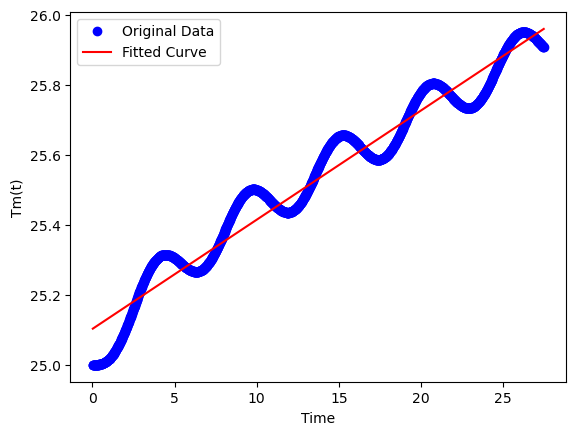

In [33]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the function Tm(t) = a + bt + ∑∆Tn sin(nωt + ϕn) for n = 1, 3, 5, 7
def tm_function(t, a, b):
    result = a + b * t
    return result

data = temperature
time = np.array(time)

# Initial guess for 'a' and 'b' parameters
initial_guess = [1.0, 1.0]

# Perform the curve fitting
popt, _ = curve_fit(tm_function, time, data, p0=initial_guess)

# Extract the fitted coefficients
a_fit = popt[0]
b_fit = popt[1]

print("Fitted 'a' coefficient:", a_fit)
print("Fitted 'b' coefficient:", b_fit)

# Generate fitted curve using the fitted coefficients
fitted_curve = tm_function(time, *popt)

# Plot the original data and the fitted curve
plt.plot(time, data, 'bo', label='Original Data')
plt.plot(time, fitted_curve, 'r-', label='Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Tm(t)')
plt.legend()
plt.show()


In [34]:
popt

array([25.10299514,  0.03117908])

In [35]:
# for node 3
amp= amplitude_data[3]
ph= phase_data[3]

In [36]:
a= 25.1663365863402
b=0.028460849031562502
amp= amplitude_data[3]
ph= phase_data[3]
result = a + b * time + amp * np.cos(2 * omega * time +  math.acos(ph))  

[25.000004813490726, 25.00001441546296, 25.000028781111666, 25.000047885833997, 25.0000717052274, 25.000100215087674, 25.0001333914071, 25.00017121037257, 25.00021364836373, 25.000260681951143, 25.00032138914586, 25.000395973329816, 25.00048436331259, 25.00058648848153, 25.00070227879626, 25.000831664783234, 25.000974577530396, 25.00113094868186, 25.00130071043261, 25.001483795523416, 25.001688265310996, 25.001914515448245, 25.002162435777652, 25.00243191703009, 25.002722850816355, 25.003035129618972, 25.003368646783983, 25.00372329651278, 25.00409897385421, 25.00449557469651, 25.004919781689228, 25.005372108568082, 25.005852415338882, 25.006360563128812, 25.00689641417589, 25.007459831818643, 25.008050680485823, 25.008668825686286, 25.009314133999002, 25.009986473063037, 25.010690881213172, 25.011427884909292, 25.01219732472044, 25.0129990424834, 25.01383288129093, 25.01469868548022, 25.01559630062129, 25.01652557350576, 25.01748635213549, 25.018478485711594, 25.019505208781805, 25.02

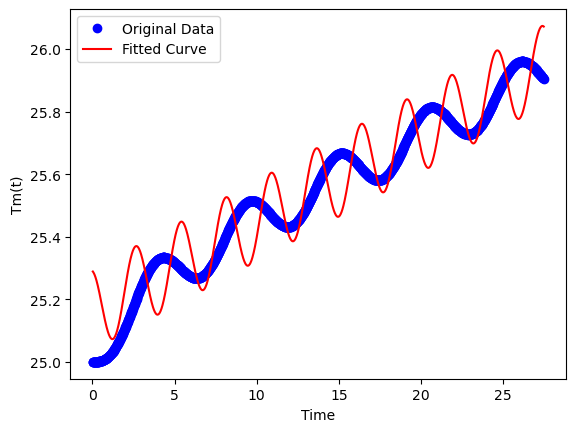

In [37]:
data =[]
# Using a loop
for key in loaded_node_temp:
    if len(loaded_node_temp[key]) >= 5:  # Make sure the list has at least 2 elements
        data.append(loaded_node_temp[key][4])

print(data)

plt.plot(time, data, 'bo', label='Original Data')
plt.plot(time,  result, 'r-', label='Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Tm(t)')
plt.legend()
plt.show()

In [38]:
import numpy as np

# Define the function Tm(t) = a + bt + ∆T * cos(nωt + ϕ) for n = 1
def tm_function(t, a, b, delta_T, phi):
    return a + b * t + delta_T * np.cos(omega * t + phi)

a= 25.1663365863402
b=0.028460849031562502
amp= amplitude_data[3]
ph= phase_data[3]


# Given new values for each term's ∆Tn and ϕn
new_delta_T = np.array([0.1, 0.2, 0.3])  # Replace with the new ∆T values
new_phi = np.array([0.2, 0.3, 0.4])  # Replace with the new ϕ values

# Angular frequency
omega = 2 * np.pi * 0.182

# Calculate the predicted temperatures using the provided coefficients and new values
predicted_temperatures = tm_function(time, a, b, amp, ph)


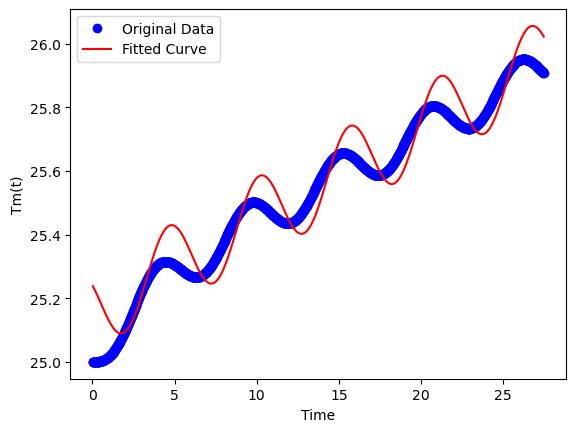

In [39]:


def tm_function(t, a, b, *params):
    result = a + b * t
    num_terms = len(params) // 2  # Since each term has both ∆Tn and ϕn
    for n in range(1, num_terms + 1):
        delta_Tn = params[2*n - 2]
        phi_n = params[2*n - 1]
        result += delta_Tn * np.cos(n * omega * t + phi_n)
    return result


initial_guess = [1.0, 1.0] + [0.0, 0.0, 0.0, 0.0]  # [a, b, ∆T1, ϕ1, ∆T3, ϕ3, ∆T5, ϕ5, ∆T7, ϕ7]


omega = 2 * np.pi * 0.182


popt, _ = curve_fit(tm_function, time, temperature, p0=initial_guess)


a_fit = popt[0]
b_fit = popt[1]
params_fit = popt[2:]  


predicted_temperature = tm_function(time, a_fit, b_fit, *params_fit)

plt.plot(time, temperature, 'bo', label='Original Data')
plt.plot(time,  predicted_temperatures, 'r-', label='Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Tm(t)')
plt.legend()
plt.show()


In [40]:
params_fit = popt[2:]

In [41]:
popt[2:]



array([-0.07287486, -1.36944258, -0.00248306, -1.31489265])